#Introduction:
Milk adulteration is the act of adding foreign, inferior, harmful, or unnecessary substances to milk to increase its quantity, shelf life, or appearance, often for economic gain. 

The milk business is growing in India, with around 2 lakh villages in the dairy industry. India is the largest exporter of milk but dismayingly, there is a huge gap between the production and consumption of milk. This massive gap is being manipulated and misused with the business of milk adulteration.

Milk adulteration has always been a matter of apprehension for the government and dairy industry. Despite all efforts to combat the constant state of vitriolic froth, the vicious circle goes on affecting the health of masses and authenticity of milk and its products.

The adulterants like detergents in milk, synthetic components, urea, caustic soda, formalin leads to catastrophic effects on health if taken for a long time as it can cause severe health problems like food poisoning, gastrointestinal complications, impairments, heart problems, cancer or even death.
Primarily, preservatives are added to the milk as adulterants to increase the shelf life of milk. Moreover, to increase the volume and quantity of milk water is added which further leads to contamination and proves to be a double whammy.
Some of the major adulterants in milk having serious adverse health effect are urea, formalin, detergents, ammonium sulphate, boric acid, caustic soda, benzoic acid, salicylic acid, hydrogen peroxide, sugars and melamine.

Several factors like dismal socio-economic status, low purchasing power of consumers, demand and supply gap, perishable nature of milk, unorganised plight of dairy industries, laxity of laws, lack of awareness regarding analytical laboratories to get the milk tested and lack of consumer vigilance worsens the menace of milk adulteration.

Over 60% to 70% of milk in India  (only 10- 15% in UK) is handled by the unorganised sector, which has following limitations.
Lack of traceability makes it hard to identify who adulterated it.
Limited field testing of milk
Weak penalty enforcement
Supply chain issue- No cold chain or proper storage
Unregulated pricing and payment to farmers

For above reasons milk vendors tempt to milk adulteration to gain maximum profit, but this process lowers the nutritional value of milk and can pose serious health risks to consumers.

Thus, I would like to build a machine learning model to classify whether milk is pure or adulterated. I have downloaded a milk data set from kaggle (https://www.kaggle.com/datasets/chetalipushkarna/milk-sample-adulteration-dataset)

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB

from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

import seaborn as sns
import pickle
import joblib

In [226]:

data=pd.read_csv('milk quality.csv')
data.head()

,Unnamed: 0,Nr,Date,Time,Ingredient,IsRawMilk,Cells,QValue,Fat,Protein,...,SPC 2962,SPC 2966,SPC 2970,SPC 2974,SPC 2977,SPC 2981,SPC 2985,SPC 2989,SPC 2993,SPC 2997
0,1039,13,3/10/2016,15:20:25,peroxide,no,82,92.89,3.58,3.37,...,0.096824,0.082412,0.067960,0.054418,0.041527,0.030426,0.021521,0.014404,0.008537,0.003582
1,1074,1,5/10/2016,14:20:14,raw,yes,66,91.26,3.47,3.38,...,0.091569,0.077725,0.062887,0.049003,0.036913,0.027039,0.018343,0.010068,0.003159,-0.001910
2,1648,3,31/8/2018,11:08:17,bicarbonate,no,895,91.85,3.51,2.98,...,0.087129,0.073408,0.059220,0.046008,0.034637,0.024646,0.015802,0.008981,0.003809,-0.000720
3,4780,4,22/9/2017,15:41:49,raw,yes,151,86.69,3.40,3.22,...,0.097520,0.083886,0.068863,0.054876,0.043321,0.033540,0.024578,0.016899,0.011012,0.006048
4,4110,1,11/10/2016,15:13:43,raw,yes,527,89.41,3.54,3.17,...,0.088662,0.074045,0.059094,0.045218,0.033200,0.023450,0.015204,0.007179,-0.000310,-0.005550


In [227]:
data.shape

(969, 536)

First, I loaded the data and read first 5 lines. This data set has 536 columns and 6 rows. It contains information about differet milk compostions, its characteristics (fat, protein, lactose, freezing point, qvalue etc.) and spectroscopic data (SPC 1002, SPC 1006 etc.) of milk at different wavelengths.

In spectroscopic analysis we observe how light interacts with a substance. Adulterants (like water, starch, detergent, urea, or synthetic milk) change milk's chemical composition, and these changes can be detected because they alter its absorption, emission, or scattering of light.
Every substance has a unique spectral signature. When an adulterant is present, it alters this signature, which can be detected.

In [228]:
# Checking null values in the data set
data.isnull().sum().sum()

np.int64(0)

In [229]:
# checking statistical discription of data
data.select_dtypes('number').iloc[:,3:].describe()

,QValue,Fat,Protein,Lactose,Solids,FFA,Citrate,FrzPoint,SNF,MUN,...,SPC 2962,SPC 2966,SPC 2970,SPC 2974,SPC 2977,SPC 2981,SPC 2985,SPC 2989,SPC 2993,SPC 2997
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,90.016584,3.620279,3.300196,4.624076,12.522487,46.131063,1443.882353,0.549450,9.034881,13.818700,...,0.095518,0.080827,0.065444,0.051453,0.039318,0.028782,0.019669,0.011948,0.005664,0.000714
std,4.998924,0.349956,0.136071,0.211785,0.453637,28.804025,174.928606,0.028454,0.338272,5.214027,...,0.005607,0.004968,0.004573,0.004465,0.004516,0.004605,0.004678,0.004772,0.004894,0.004999
min,62.650000,2.240000,2.750000,4.060000,11.120000,2.000000,1075.000000,0.354000,8.210000,0.000000,...,0.072178,0.057658,0.042620,0.028749,0.016397,0.005625,-0.003476,-0.011089,-0.017335,-0.022489
25%,87.570000,3.410000,3.220000,4.500000,12.230000,29.000000,1331.000000,0.531000,8.790000,11.200000,...,0.092101,0.077948,0.062903,0.048927,0.036725,0.026020,0.016814,0.009072,0.002688,-0.002344
50%,90.750000,3.610000,3.310000,4.620000,12.490000,43.000000,1413.000000,0.554000,9.020000,13.700000,...,0.095619,0.081035,0.065606,0.051649,0.039468,0.028851,0.019688,0.011987,0.005695,0.000728
75%,93.400000,3.820000,3.380000,4.700000,12.800000,56.000000,1531.000000,0.568000,9.250000,16.000000,...,0.099092,0.084048,0.068325,0.054246,0.041942,0.031463,0.022295,0.014628,0.008409,0.003643
max,100.000000,5.420000,3.840000,5.500000,14.680000,394.000000,2217.000000,0.635000,10.180000,44.400000,...,0.115770,0.100700,0.085042,0.070947,0.059062,0.048582,0.038767,0.030422,0.024213,0.019570


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 536 entries, Unnamed: 0 to SPC 2997
dtypes: float64(527), int64(5), object(4)
memory usage: 4.0+ MB


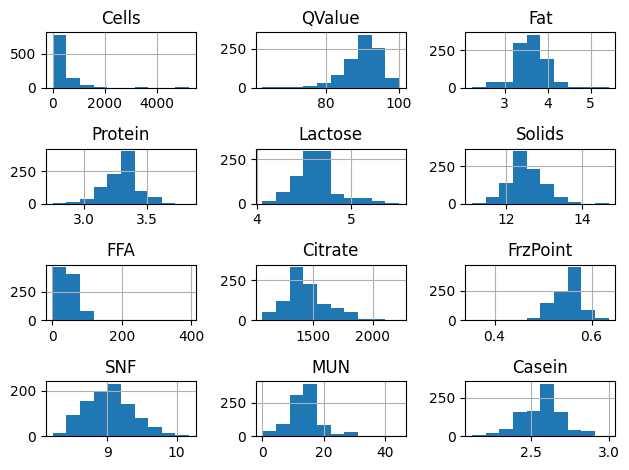

In [231]:
# viewing data distribution of different columns
data.iloc[:, 6:18].hist()
plt.tight_layout();

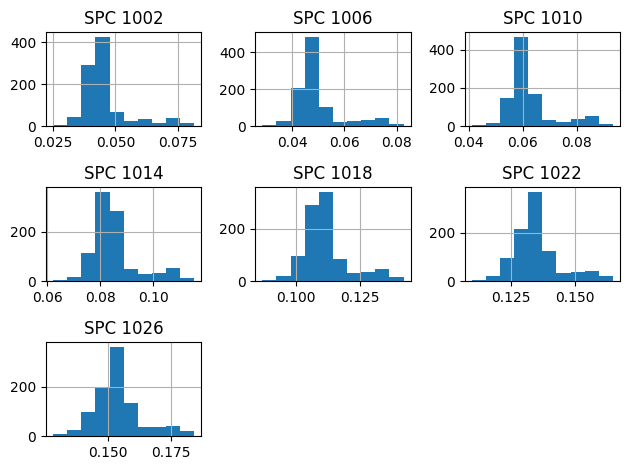

In [232]:
# viewing data distribution of few spectroscopic results columns
data.iloc[:,18:25].hist()
plt.tight_layout()

Now I want ot view the data distribution of Traget coulmn 'isRawMilk'. It's clear from the pie chart below that our data set is very balanced as 51.50% of the values are of raw milk category while 48.50% belong to adulterated milk category.

In [233]:
data_raw= data.IsRawMilk.value_counts().reset_index()
data_raw

,IsRawMilk,count
0,yes,499
1,no,470


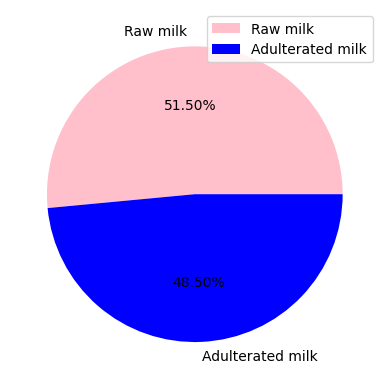

In [234]:
plt.pie(data_raw['count'], labels=['Raw milk', 'Adulterated milk'], autopct='%.2f%%', colors=['pink', 'blue'])
plt.legend(loc='upper right');

Below, I hve visualized the % of different kinds of adulterated milk present in our data set

In [235]:
df1=data.Ingredient.value_counts().reset_index()
df1

,Ingredient,count
0,raw,499
1,formaldehyde,105
2,sucrose,98
3,bicarbonate,97
4,peroxide,89
5,starch,81


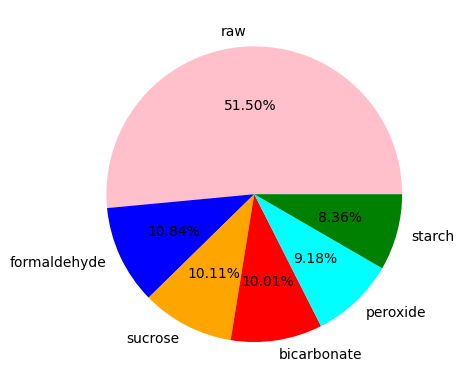

In [236]:
plt.pie(df1['count'], labels=df1['Ingredient'], autopct='%.2f%%', colors=['pink','blue','orange','red','cyan','green']);

Now I am making categories of traget column into numerical categories

In [237]:
# mapping yes to 0 and no to 1.
target_map={'yes':0, 'no':1}
data.IsRawMilk=data.IsRawMilk.map(target_map)
data.IsRawMilk.value_counts()

IsRawMilk
0    499
1    470
Name: count, dtype: int64

Our data set contains follwing 5 adulterants.

Formaldehyde: Used as a preservative, it can extend the shelf life of milk but is harmful if consumed.

Sucrose: Added to increase the milk's solid content and mask dilution with water.

Bicarbonate: Often added to neutralize acidity and extend shelf life, but can cause digestive issues.

Peroxide: Used as a preservative to extend the shelf life of milk, but it is a harmful adulterant.

Starch: Added to increase the apparent solid content of diluted milk

Now I would like to view various visualization of milk with different adulterants

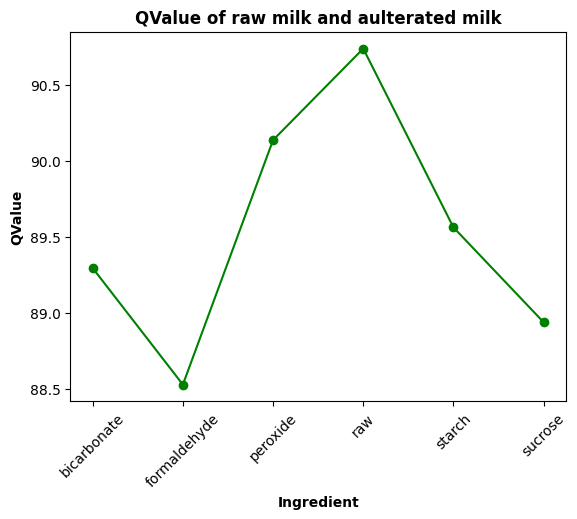

In [238]:
# viewing QValues of different kinds of milk

data_ing=data.groupby('Ingredient')[ 'QValue'].mean().reset_index()
plt.plot(data_ing.Ingredient, data_ing.QValue,marker='o', color='green')
plt.xlabel('Ingredient', fontweight='bold')
plt.ylabel('QValue', fontweight='bold')
plt.xticks(rotation=45)
plt.title('QValue of raw milk and aulterated milk', fontweight='bold');

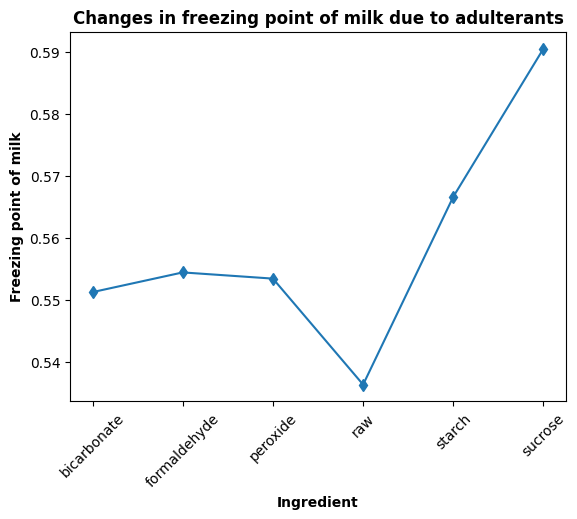

In [239]:
# viewing changes in freezing point of milk with diferrent adulterants

data_frz=data.groupby('Ingredient').FrzPoint.mean().reset_index()
data_frz
plt.plot(data_frz.Ingredient, data_frz.FrzPoint, marker='d')
plt.xlabel('Ingredient', fontweight='bold')
plt.ylabel('Freezing point of milk', fontweight='bold')
plt.xticks(rotation=45)
plt.title('Changes in freezing point of milk due to adulterants', fontweight='bold');

Spectroscopic result is like finger prints of milk. Spectroscopic results differ  with different kinds of adulterated milk, thus I want to visualize mean spectral curve of different types of milk 

In [240]:
column_with_spc=data.columns.to_list()[18:]
#column_with_spc
data_spc=data.groupby('Ingredient')[column_with_spc].mean().T
data_spc

Ingredient,bicarbonate,formaldehyde,peroxide,raw,starch,sucrose
SPC 1002,0.043581,0.043587,0.044895,0.041385,0.054147,0.068120
SPC 1006,0.047473,0.047545,0.048620,0.045125,0.058714,0.069427
SPC 1010,0.060521,0.060903,0.061594,0.058215,0.072782,0.080521
SPC 1014,0.082952,0.083933,0.084134,0.080783,0.096232,0.102584
SPC 1018,0.109343,0.110932,0.110685,0.107222,0.123442,0.128828
...,...,...,...,...,...,...
SPC 2981,0.029023,0.029598,0.031238,0.027450,0.030850,0.030514
SPC 2985,0.019926,0.020694,0.022262,0.018303,0.021956,0.021029
SPC 2989,0.012266,0.013116,0.014573,0.010552,0.014569,0.012938
SPC 2993,0.006155,0.006907,0.008316,0.004243,0.008395,0.006415


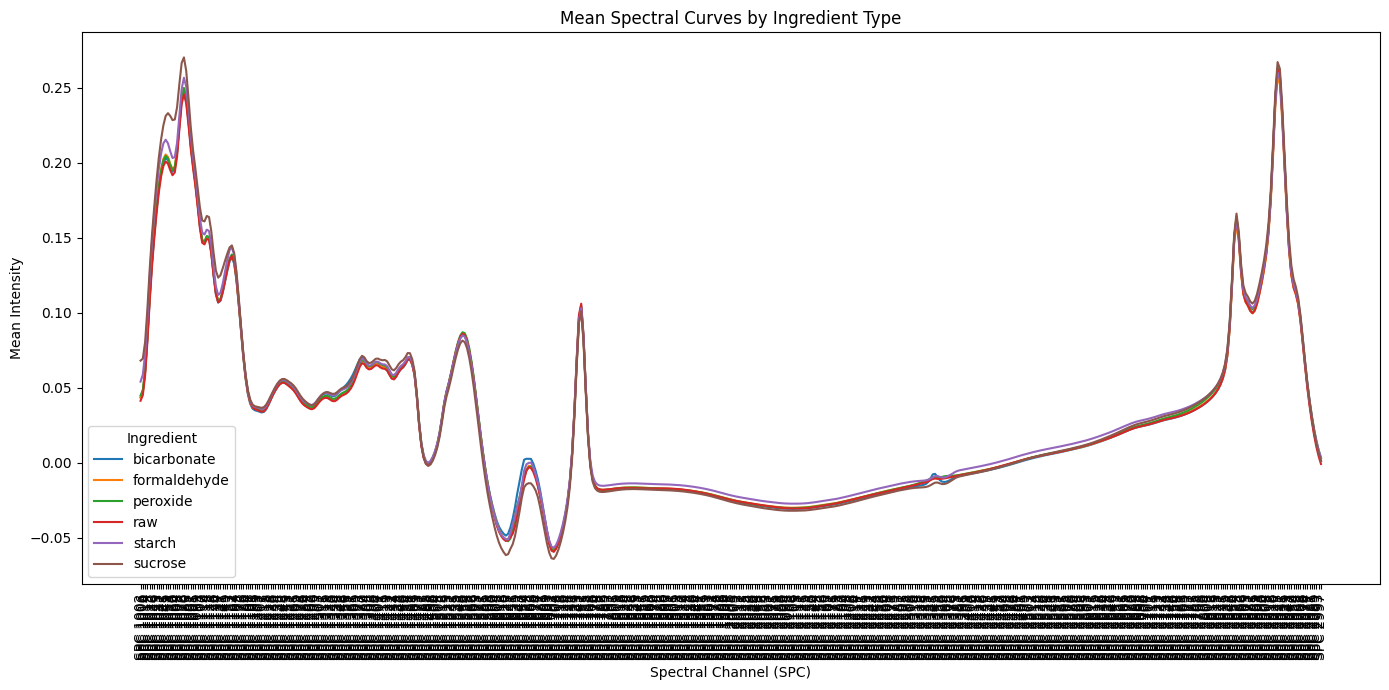

In [241]:
#making spectral curves of raw milk and adulterated milk

plt.figure(figsize=(14, 7))
for ingre in data_spc.columns:
    plt.plot(data_spc.index, data_spc[ingre], label=ingre)

# Plot formatting
plt.title('Mean Spectral Curves by Ingredient Type')
plt.xlabel('Spectral Channel (SPC)')
plt.ylabel('Mean Intensity')
plt.xticks(rotation=90)
plt.legend(title='Ingredient')
plt.tight_layout()

Different peaks ( near to mean intensity 0.2 to .25) can be seen in above plot, which is a indication of presence of different adulterants in milk. Since x-axis ticks are not clearly visible as it contains names of 536 columns thus I have plotted below only 10 columns so that xticks are shown clearly. 

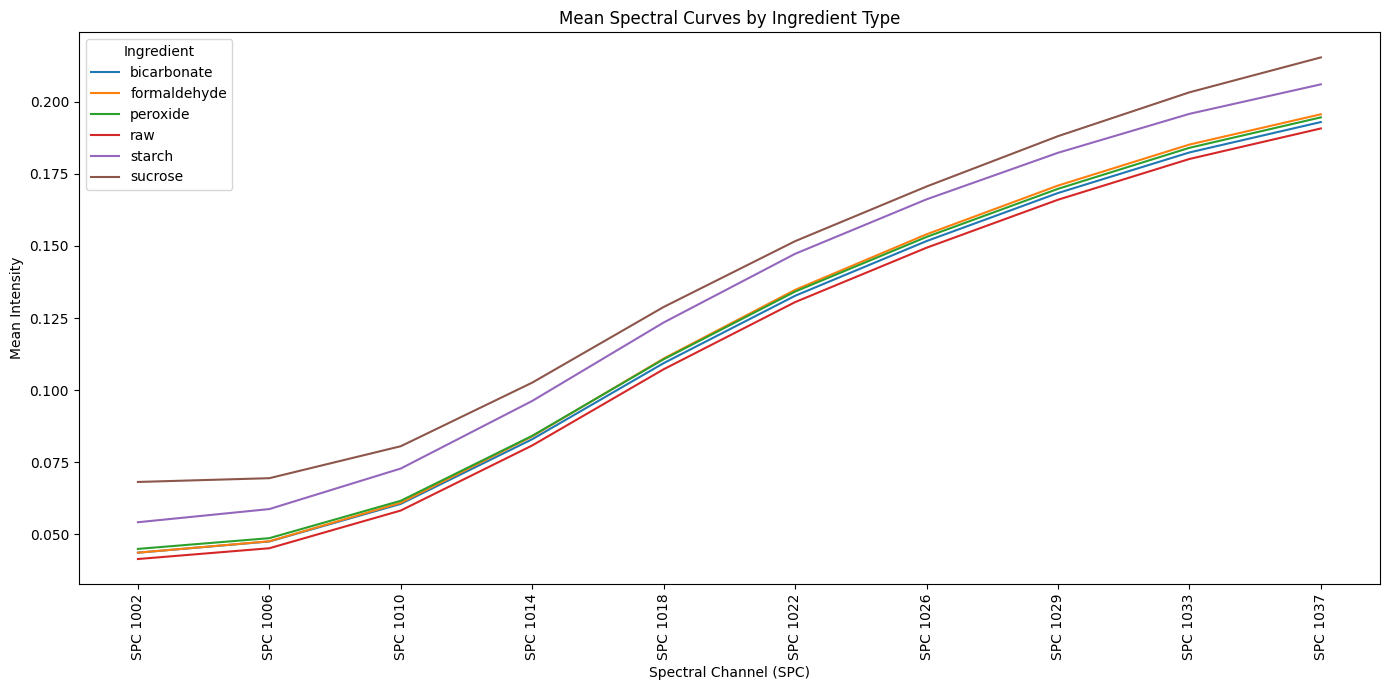

In [242]:
plt.figure(figsize=(14, 7))
for ingre in data_spc.columns:
    plt.plot(data_spc.index[0:10], data_spc[ingre][0:10], label=ingre)

# Plot formatting
plt.title('Mean Spectral Curves by Ingredient Type')
plt.xlabel('Spectral Channel (SPC)')
plt.ylabel('Mean Intensity')
plt.xticks(rotation=90)
plt.legend(title='Ingredient')
plt.tight_layout()

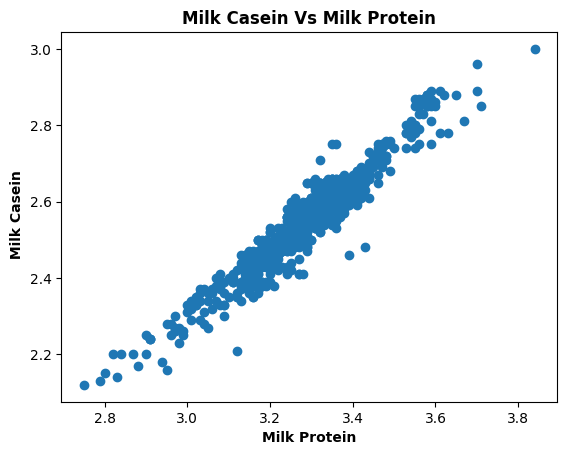

In [243]:
# plotting milk protien vs casein 

plt.scatter(data.Protein, data.Casein)
plt.xlabel('Milk Protein', fontweight='bold')
plt.ylabel(' Milk Casein', fontweight='bold')
plt.title('Milk Casein Vs Milk Protein', fontweight='bold');

Now I want to see the correlation between target column and different features.

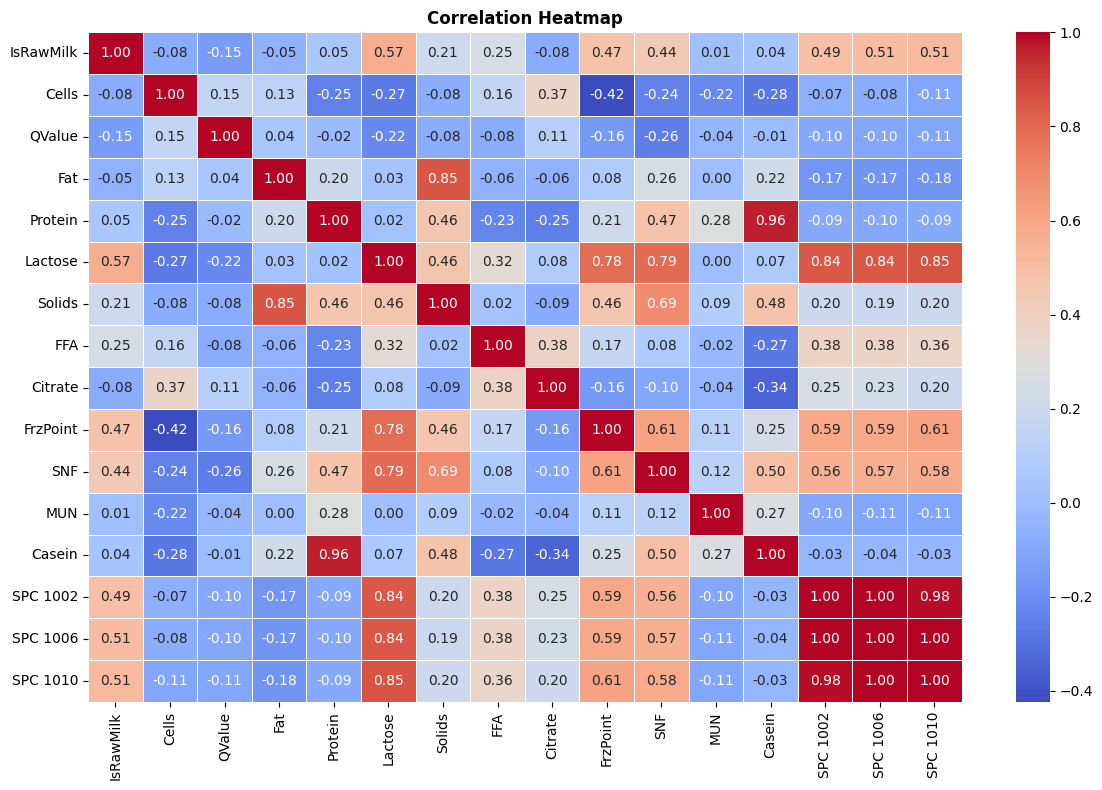

In [244]:
# making correlation matrix
data_corr=data.iloc[:, 5:21].corr() # including only interested features in data frame
# 1. Set up the figure size
plt.figure(figsize=(12, 8))

# 2. Create the heatmap
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 3. Title
plt.title('Correlation Heatmap', fontweight='bold')
plt.tight_layout()

Above correlation is showing us the features which are stronggly correalted with target. Thus Now I want to visualize the boxplot of those features to see the outlier. 

<Axes: >

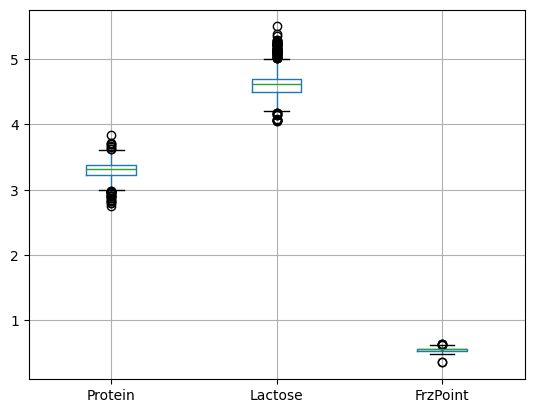

In [245]:
# Making boxplot of interesed features
data[['Protein','Lactose', 'FrzPoint']].boxplot()

<Axes: >

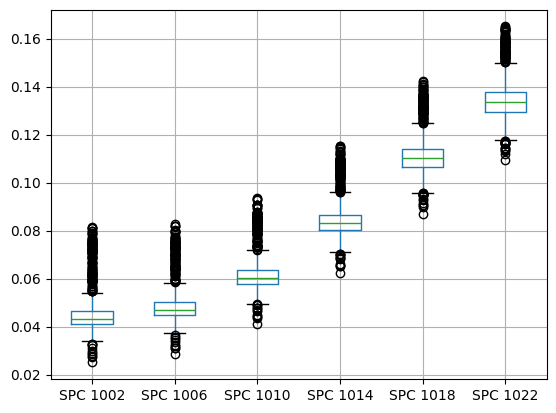

In [246]:
# viewing box plot of few spectroscopic data
data.iloc[:,18:24].boxplot()

After seeing above correlation heatmap, Now I am selecting the features for building machine learning model. We can see that 'Lactose','FrzPoint','SNF'  and spectroscopic data (SPC 1002 -SPC 2997) showing srtong correlation with target column. Thus I have decided that I will build model in two trails for this project.
In trail 1 I will  choose  features like 'Lactose','FrzPoint','SNF'  and spectroscopic milk analyis results (SPC 1002 -SPC 2997) to build diferrent classification models and then compare their performances.

In trail 2 I will choose only features like spectroscopic milk analyis results (SPC 1002 -SPC 2997) to build diferrent classification models and then compare their performances.

After comparing trail1 and trail 2 I will choose the best model and then built a Milk Adulteration detection app with the help of streamlit.

In [ ]:
# selecting the fatures for model building for TRAIL 1

col=['Lactose','FrzPoint','SNF']
col1=data.columns.to_list()[18:]
col.extend(col1) # conbining all interested features for model building


In [ ]:
# assigning x

x=data[col]
x

,Lactose,FrzPoint,SNF,SPC 1002,SPC 1006,SPC 1010,SPC 1014,SPC 1018,SPC 1022,SPC 1026,...,SPC 2962,SPC 2966,SPC 2970,SPC 2974,SPC 2977,SPC 2981,SPC 2985,SPC 2989,SPC 2993,SPC 2997
0,4.57,0.564,8.93,0.044753,0.048668,0.061624,0.083872,0.110509,0.133889,0.152204,...,0.096824,0.082412,0.067960,0.054418,0.041527,0.030426,0.021521,0.014404,0.008537,0.003582
1,4.59,0.564,8.97,0.042704,0.046796,0.060819,0.083367,0.109326,0.132789,0.151886,...,0.091569,0.077725,0.062887,0.049003,0.036913,0.027039,0.018343,0.010068,0.003159,-0.001910
2,4.50,0.522,8.63,0.042737,0.046822,0.059619,0.081043,0.106065,0.128756,0.147482,...,0.087129,0.073408,0.059220,0.046008,0.034637,0.024646,0.015802,0.008981,0.003809,-0.000720
3,4.66,0.541,9.21,0.045112,0.048834,0.062371,0.086435,0.114247,0.137841,0.157145,...,0.097520,0.083886,0.068863,0.054876,0.043321,0.033540,0.024578,0.016899,0.011012,0.006048
4,4.53,0.556,8.66,0.041330,0.045220,0.058048,0.080771,0.107828,0.131228,0.149674,...,0.088662,0.074045,0.059094,0.045218,0.033200,0.023450,0.015204,0.007179,-0.000310,-0.005550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,4.32,0.504,8.52,0.040469,0.044176,0.056155,0.077140,0.102459,0.125136,0.143551,...,0.091714,0.077592,0.062860,0.049189,0.037669,0.028057,0.019258,0.011206,0.004270,-0.000454
965,4.75,0.561,9.64,0.041511,0.045277,0.058496,0.081400,0.108104,0.131722,0.150840,...,0.097472,0.080994,0.063711,0.048035,0.034527,0.022658,0.012867,0.004813,-0.002039,-0.007576
966,4.67,0.542,9.21,0.044518,0.048338,0.062156,0.085864,0.113340,0.137527,0.157083,...,0.096722,0.082313,0.067213,0.054163,0.042833,0.032504,0.023497,0.015788,0.009637,0.004912
967,4.73,0.556,9.37,0.042755,0.046811,0.059718,0.082317,0.109334,0.132925,0.151468,...,0.100560,0.084209,0.066859,0.051367,0.038372,0.027638,0.018606,0.010341,0.003644,-0.001038


In [ ]:
# assigning y

y=data['IsRawMilk']
y

0      1
1      0
2      1
3      0
4      0
      ..
964    0
965    1
966    0
967    1
968    0
Name: IsRawMilk, Length: 969, dtype: int64

In [ ]:
# scaling data

scaler1=RobustScaler()
x=scaler1.fit_transform(x)

In [ ]:

pca1=PCA(n_components=.99)#--- these codes are to check how mamy no. of components needed for for explaining 99% of variance
pca1.fit_transform(x)
print(f'No. of components: {pca1.n_components_}')

No. of components: 10


Although I need to take only 10 number of pca components to explain 99% variance but when I increase the no. of comopents from 10 to 14 (total variance ratio expalined = 99.4), the accuracy of the classification model  improves from 89% to 97% for logistic regression. 

The reseaon for this is that PCA ranks components based on variance, not based on how useful they are for classification.
Components 11–14 may capture very subtle variance, but this tiny variance might contain crucial class-separating information.
Some features that are not very "loud" in terms of total variance may still define class boundaries very effectively.
PCA cares about variance, but your model cares about discriminative power.

Thus I have chosen  14 no. of components for pca. First I have built a logistic regressio model 

In [ ]:
# using pca to reduce the dimentionality of the data.

pca1=PCA(n_components=14)
pca_x=pca1.fit_transform(x)
pca1.explained_variance_ratio_.sum()



np.float64(0.9949919711354805)

In [253]:
x_train, x_test, y_train, y_test=train_test_split(pca_x,y,test_size=.2,random_state=32)
x_test.shape

(194, 14)

In [254]:
log_reg_1=LogisticRegression(max_iter=500)
log_reg_1.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [255]:
log_pred_1=log_reg_1.predict(x_test)

In [256]:
acury_score=accuracy_score(y_test,log_pred_1)
acury_score 

0.9742268041237113

In [257]:
print(confusion_matrix(y_test,log_pred_1))

[[103   1]
 [  4  86]]


Now, I want to build diferrent classification models and compare their performances with accuracy scores, classification reports and auc (area under curve) values.

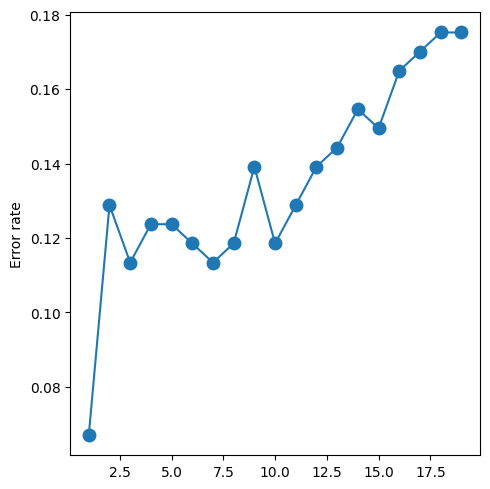

In [258]:
# I want to choose number of neighbours for knn model from graph below.
error_rate=[]

for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))
plt.figure(figsize=(5,5))
plt.plot(range(1,20), error_rate, marker ='o', markersize=9)
plt.ylabel('Error rate')
plt.tight_layout()

Below, I am going to build different classification models and compare their perfomances.

Accuracy score for log_regg: 0.974
classification report for log_regg:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       104
           1       0.99      0.96      0.97        90

    accuracy                           0.97       194
   macro avg       0.98      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194




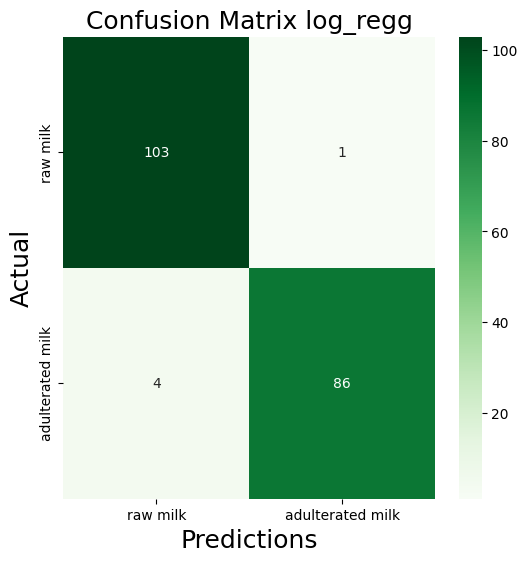

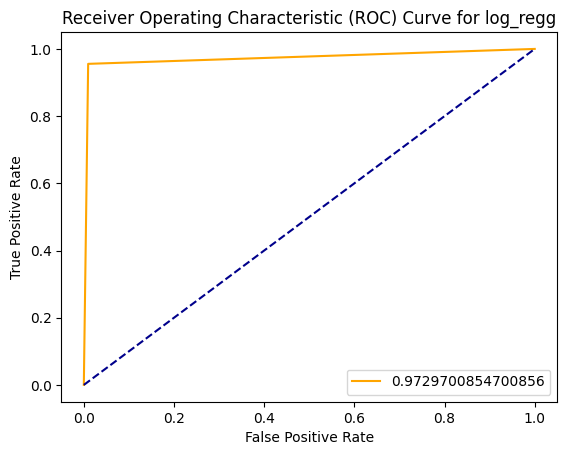

Accuracy score for naive_b: 0.892
classification report for naive_b:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       104
           1       0.93      0.83      0.88        90

    accuracy                           0.89       194
   macro avg       0.90      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194




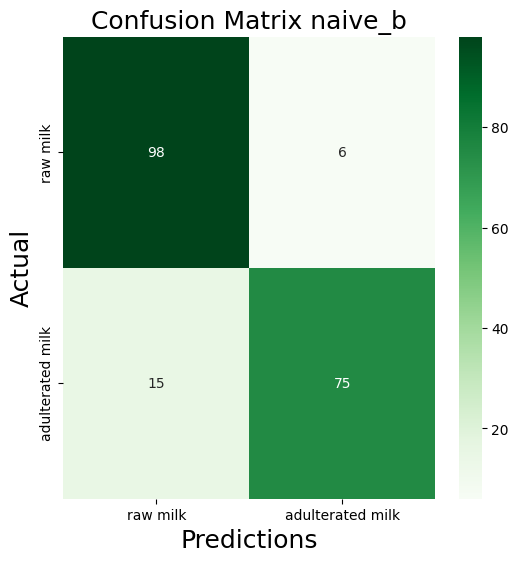

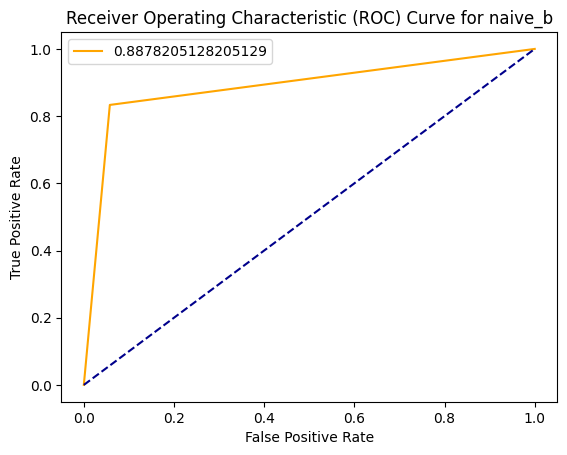

Accuracy score for knn: 0.887
classification report for knn:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       104
           1       0.89      0.87      0.88        90

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194




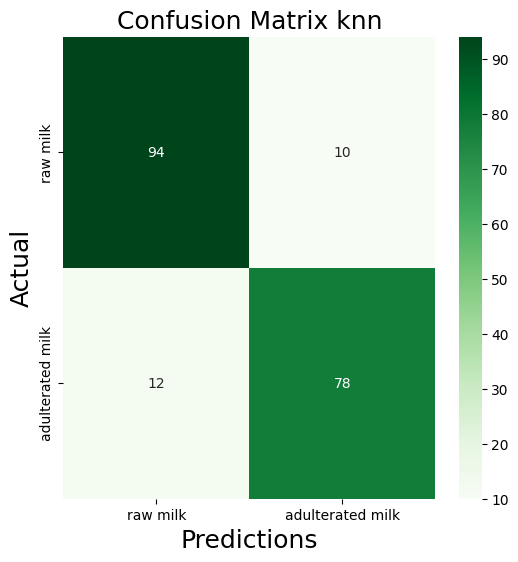

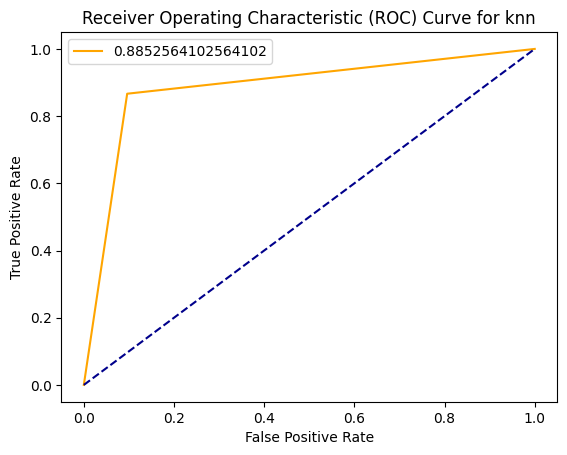

Accuracy score for DT_gini: 0.923
classification report for DT_gini:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       104
           1       0.90      0.93      0.92        90

    accuracy                           0.92       194
   macro avg       0.92      0.92      0.92       194
weighted avg       0.92      0.92      0.92       194




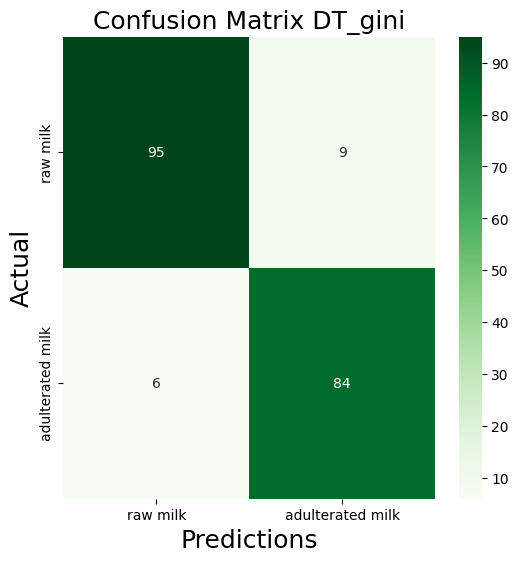

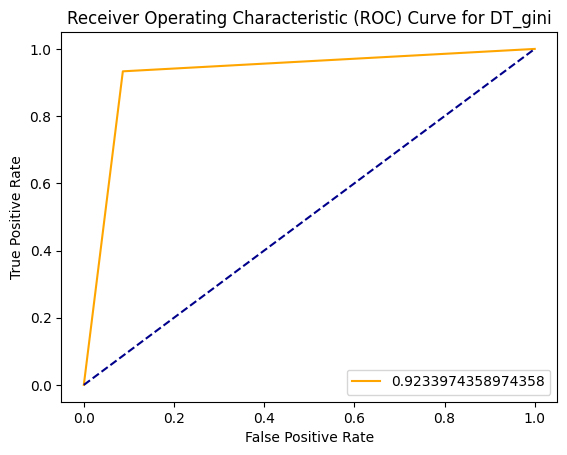

Accuracy score for DT_entropy: 0.923
classification report for DT_entropy:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       104
           1       0.92      0.91      0.92        90

    accuracy                           0.92       194
   macro avg       0.92      0.92      0.92       194
weighted avg       0.92      0.92      0.92       194




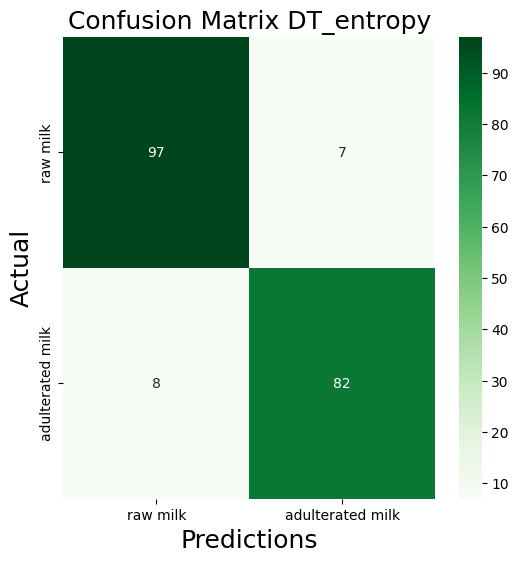

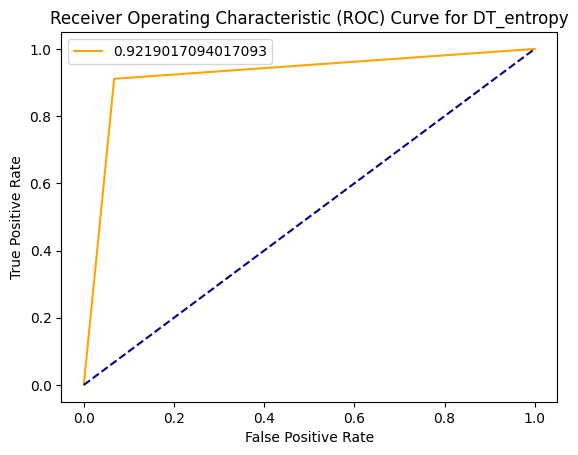

Accuracy score for svm_linear: 0.979
classification report for svm_linear:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       104
           1       0.98      0.98      0.98        90

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194




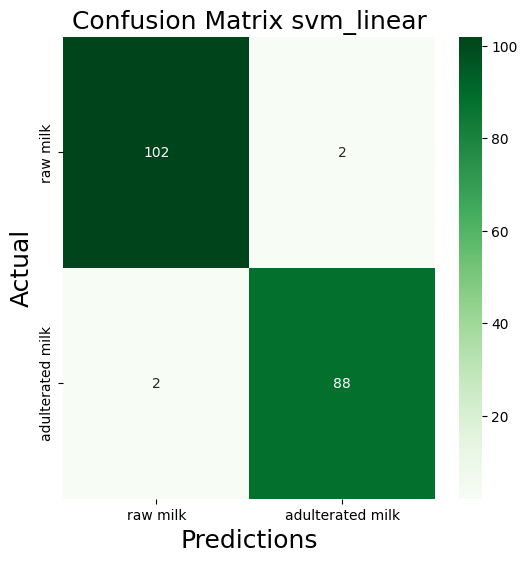

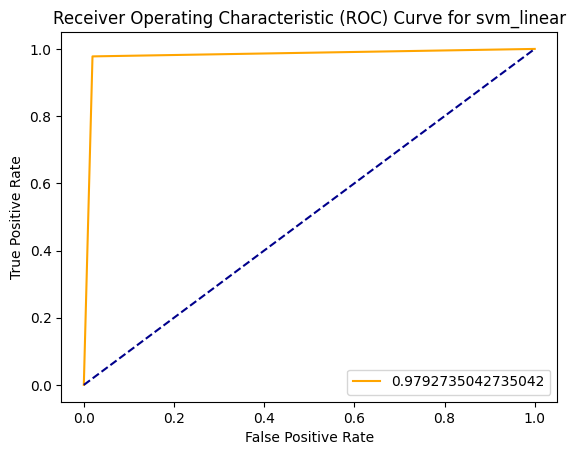

Accuracy score for svm_rbf: 0.928
classification report for svm_rbf:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.93      0.91      0.92        90

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194




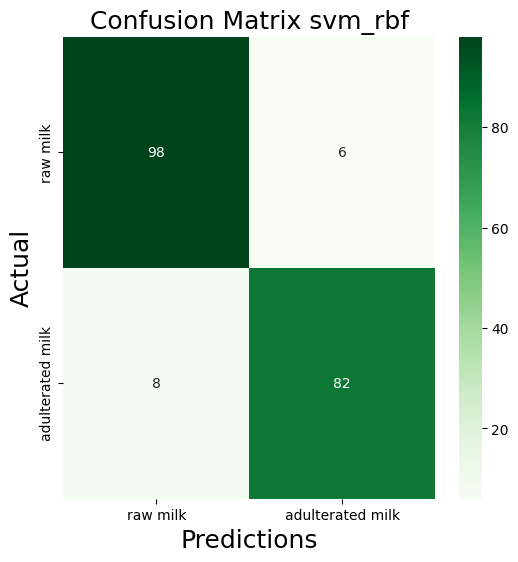

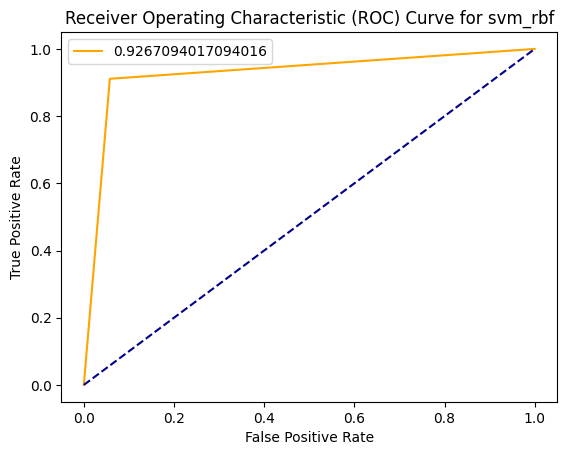

Accuracy score for svm_sigmoid: 0.531
classification report for svm_sigmoid:
               precision    recall  f1-score   support

           0       0.57      0.54      0.55       104
           1       0.49      0.52      0.51        90

    accuracy                           0.53       194
   macro avg       0.53      0.53      0.53       194
weighted avg       0.53      0.53      0.53       194




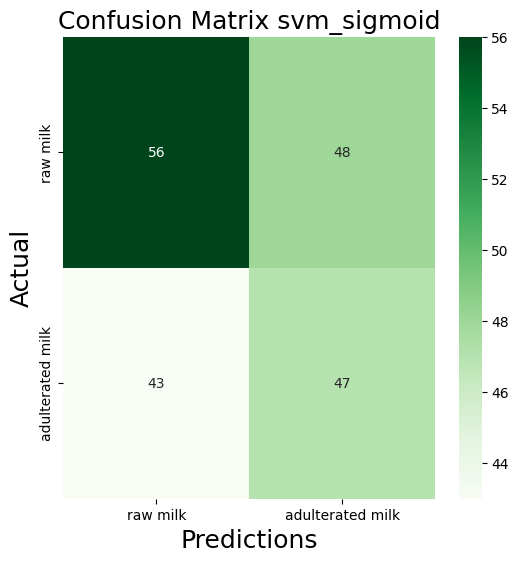

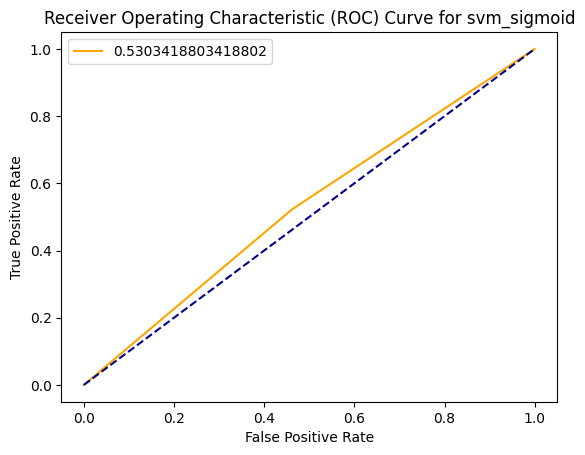

In [259]:
classification_models=[LogisticRegression(max_iter=500), GaussianNB(), KNeighborsClassifier(n_neighbors=3),
                        DecisionTreeClassifier(criterion='gini', random_state=32),
                        DecisionTreeClassifier(criterion='entropy', random_state=32),
                        svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),svm.SVC(kernel='sigmoid')]

model_name =['log_regg','naive_b','knn', 'DT_gini', 'DT_entropy', 'svm_linear', 'svm_rbf','svm_sigmoid']

all_accuracy_score=[] # I have made this list to plot different ML models vs accuracy scores later on

#Creating for loop to train different models
for i in range(len(classification_models)): 
    model=classification_models[i].fit(x_train,y_train)
    model_pred= model.predict(x_test)

    accuracy=accuracy_score(y_test,model_pred)
    all_accuracy_score.append(accuracy)
    class_report= classification_report(y_test,model_pred)

    
    print(f'Accuracy score for {model_name[i]}: {round(accuracy,3)}')
    print(f'classification report for {model_name[i]}:\n {class_report}\n')

    # creating confusion matrix
    conf_mat = confusion_matrix(y_test, model_pred)
    labels = ['raw milk', 'adulterated milk']
    # Plot confusion matrix with custom labels
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(conf_mat, 
                annot=True, 
                fmt='d', 
                cmap='Greens',
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actual', fontsize=18)
    plt.title(f'Confusion Matrix {model_name[i]}', fontsize=18)
    plt.show()

    
    # creating roc auc curve
    auc = roc_auc_score(y_test, model_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    plt.plot(fpr, tpr, color='orange', label=auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name[i]}')
    plt.legend()
    plt.show()

       


Below, I have plotted different models vs their accuracy scores for TRAIL 1.

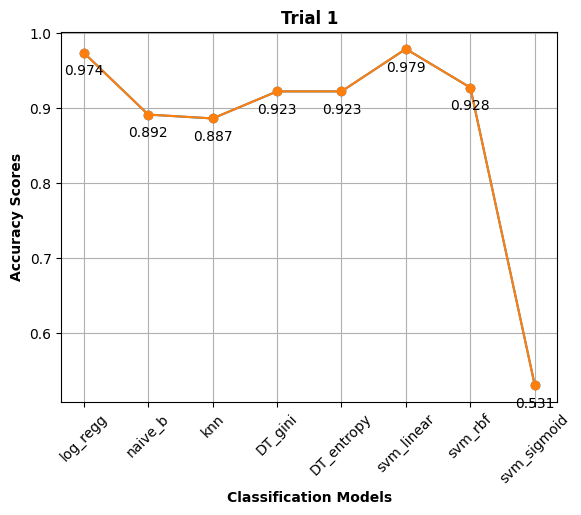

In [260]:
x21=model_name
y21=all_accuracy_score

plt.plot(x21,y21, marker='o')
for i in range(len(x21)):
    plt.text(x21[i], y21[i]-.03, str(round(y21[i],3)), ha='center')
plt.plot(model_name,all_accuracy_score, marker='o')
plt.grid()
plt.xlabel('Classification Models', fontweight='bold')
plt.ylabel('Accuracy Scores', fontweight='bold')
plt.title('Trial 1',fontweight='bold')

plt.xticks(rotation=45);

TRAIL 2: Now I want to select only those features which contains spectroscopic results of milk (SPC1002, SPC2997) and build different models and compare their performances.

In [261]:

x1=data.iloc[:, 18:]


In [262]:
#scaling data
scaler=RobustScaler()
x1 =scaler.fit_transform(x1)

In [263]:

y1=data['IsRawMilk']

In [264]:
# checking how many pricipal components we need to choose for explaining 99% of variance.
pca= PCA(n_components=.99)
pca.fit_transform(x1)
pca.n_components_ 

np.int64(10)

In [265]:
pca=PCA(n_components=12)
pca_x1=pca.fit_transform(x1)
pca.explained_variance_ratio_.sum() # to see how much variance has been expained by pca

np.float64(0.9938139325594324)

In [266]:
x1_train,x1_test,y1_train, y1_test =train_test_split(pca_x1,y1,test_size=.2,random_state=32)

x1_test.shape

(194, 12)

First I want to build a logistic regression model and then different classification models to compare their performances

In [267]:
log_reg=LogisticRegression(max_iter=500)
log_reg.fit(x1_train,y1_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [268]:
log_pred=log_reg.predict(x1_test)

In [269]:
acury_score1=accuracy_score(y1_test,log_pred)
acury_score1

0.9587628865979382

In [270]:
confu=confusion_matrix(y1_test,log_pred)
confu

array([[100,   4],
       [  4,  86]])

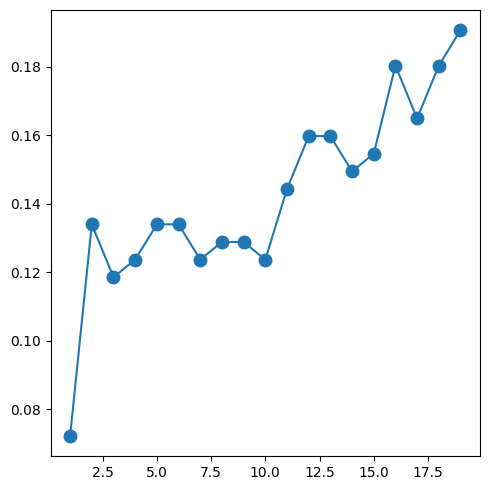

In [271]:
# want to know how many neighbours I need to choose for building knn model
error_rate=[]

for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train, y1_train)
    pred= knn.predict(x1_test)
    error_rate.append(np.mean(pred != y1_test))
plt.figure(figsize=(5,5))
plt.plot(range(1,20), error_rate, marker ='o', markersize=9)
plt.tight_layout()

Accuracy score for log_regg: 0.959
classification report for log_regg:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       104
           1       0.96      0.96      0.96        90

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194




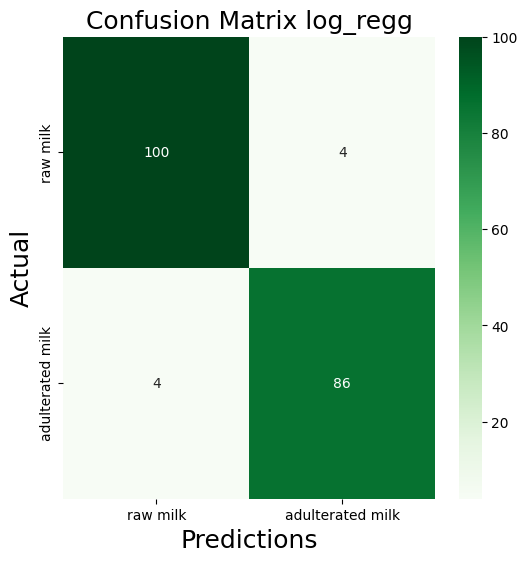

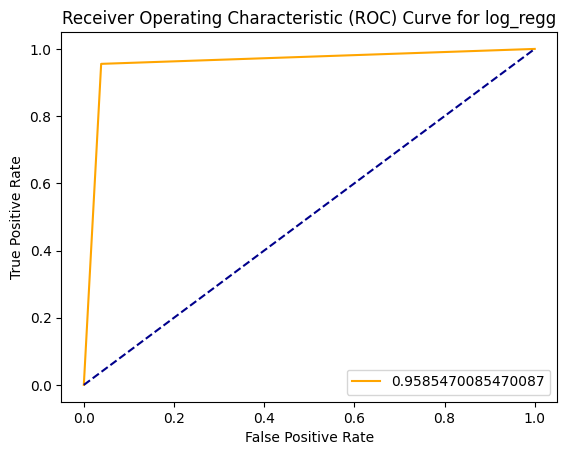

Accuracy score for naive_b: 0.856
classification report for naive_b:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       104
           1       0.88      0.80      0.84        90

    accuracy                           0.86       194
   macro avg       0.86      0.85      0.85       194
weighted avg       0.86      0.86      0.85       194




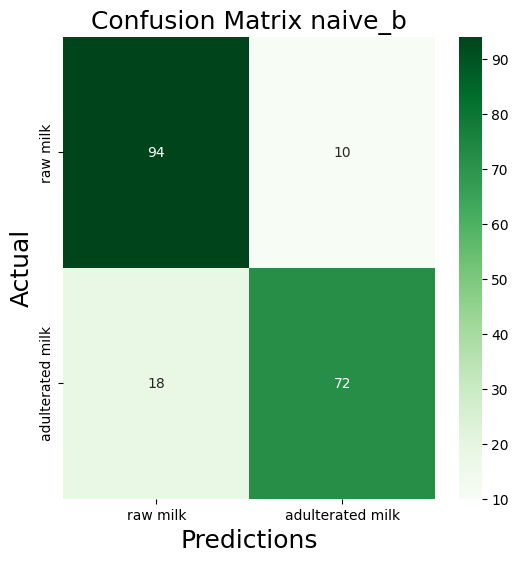

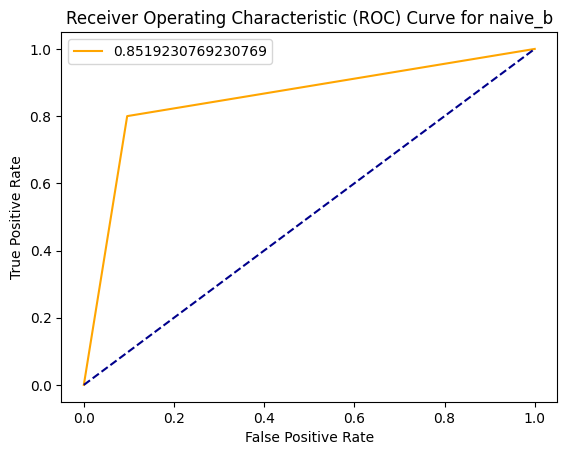

Accuracy score for knn: 0.881
classification report for knn:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       104
           1       0.89      0.84      0.87        90

    accuracy                           0.88       194
   macro avg       0.88      0.88      0.88       194
weighted avg       0.88      0.88      0.88       194




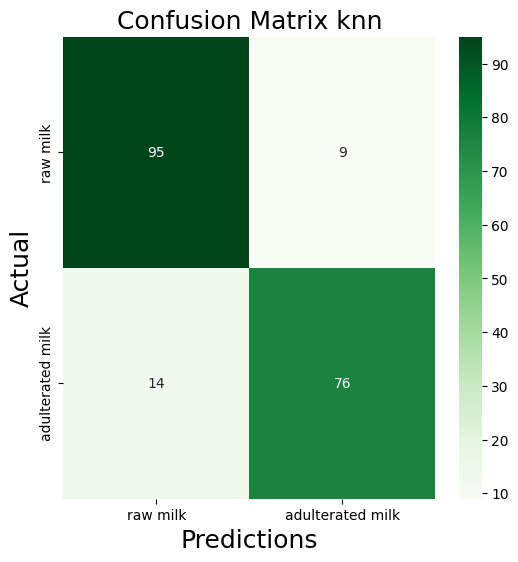

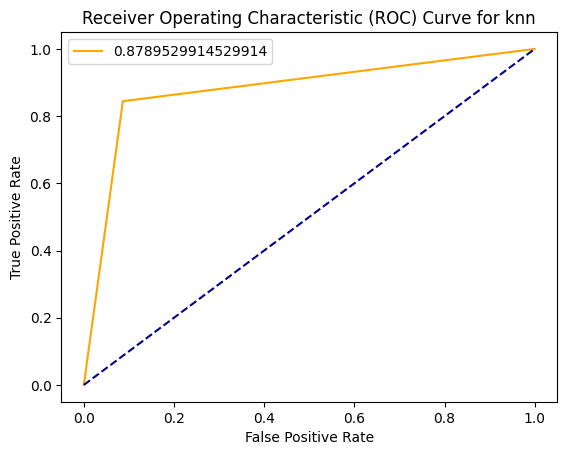

Accuracy score for DT_gini: 0.912
classification report for DT_gini:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       104
           1       0.89      0.92      0.91        90

    accuracy                           0.91       194
   macro avg       0.91      0.91      0.91       194
weighted avg       0.91      0.91      0.91       194




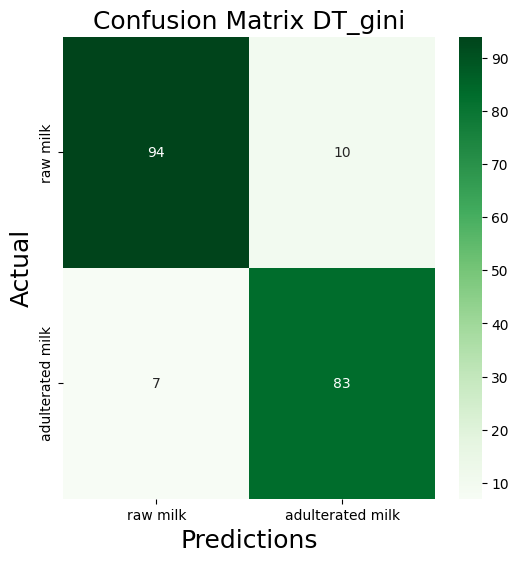

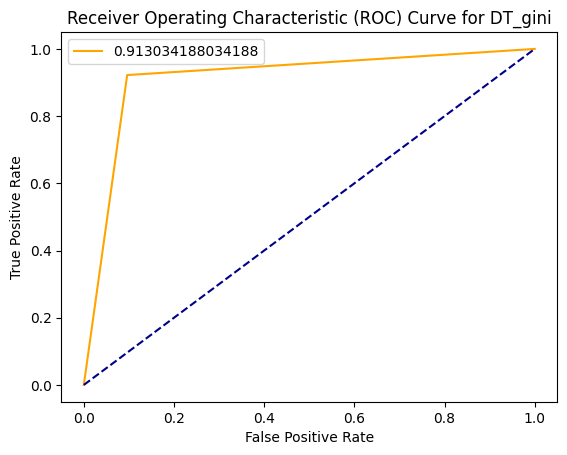

Accuracy score for DT_entropy: 0.938
classification report for DT_entropy:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       104
           1       0.91      0.96      0.93        90

    accuracy                           0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194




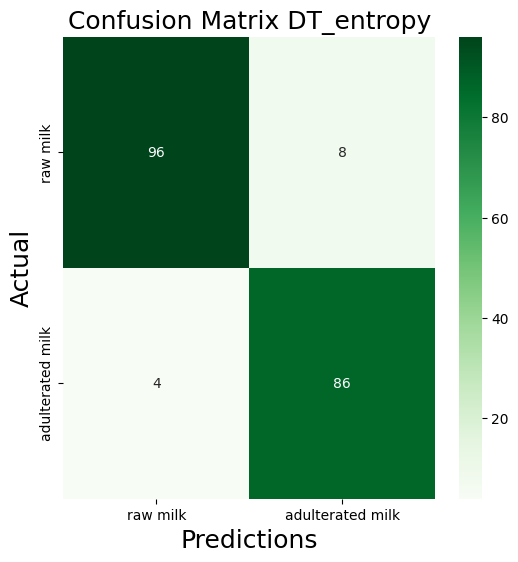

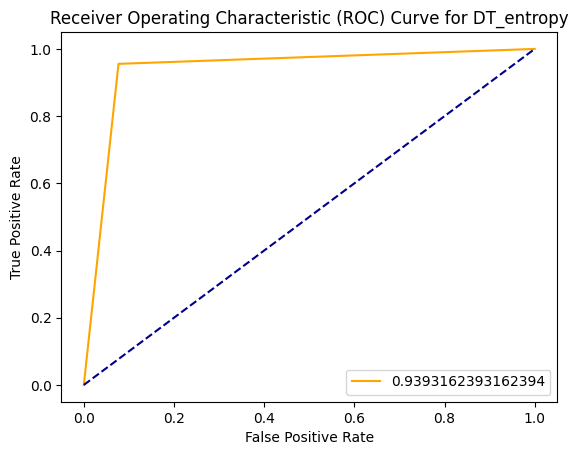

Accuracy score for svm_linear: 0.954
classification report for svm_linear:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       104
           1       0.94      0.97      0.95        90

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194




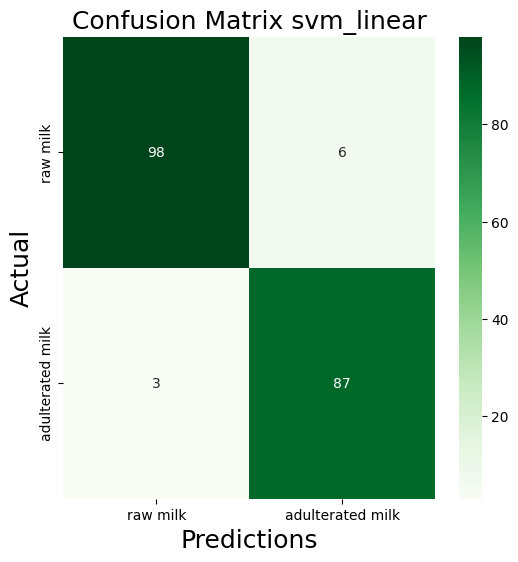

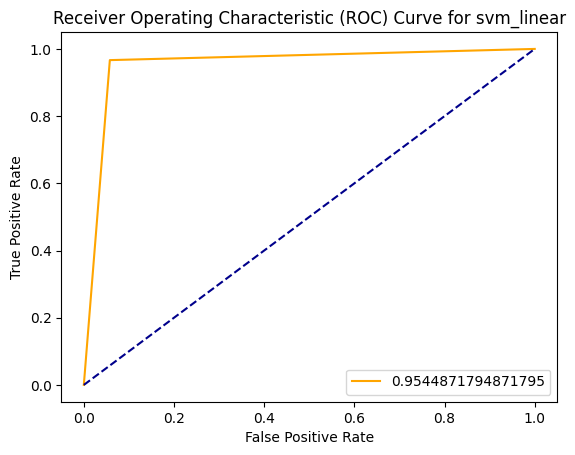

Accuracy score for svm_rbf: 0.871
classification report for svm_rbf:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.86      0.87      0.86        90

    accuracy                           0.87       194
   macro avg       0.87      0.87      0.87       194
weighted avg       0.87      0.87      0.87       194




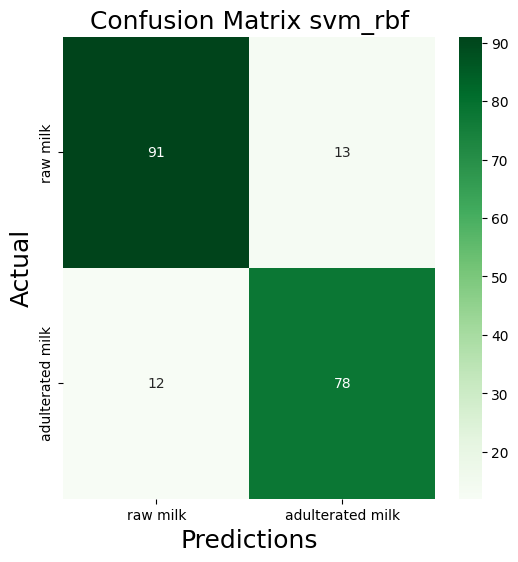

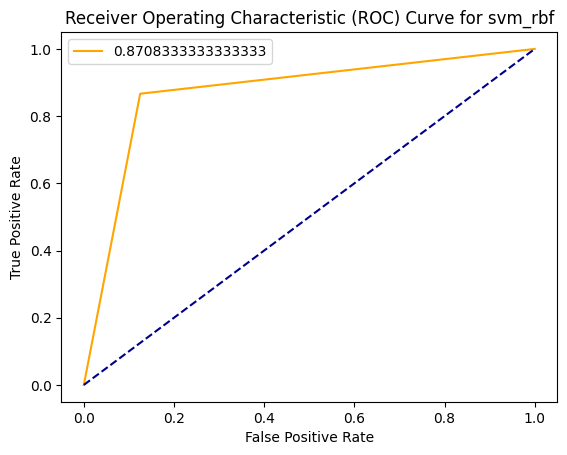

Accuracy score for svm_sigmoid: 0.531
classification report for svm_sigmoid:
               precision    recall  f1-score   support

           0       0.57      0.54      0.55       104
           1       0.49      0.52      0.51        90

    accuracy                           0.53       194
   macro avg       0.53      0.53      0.53       194
weighted avg       0.53      0.53      0.53       194




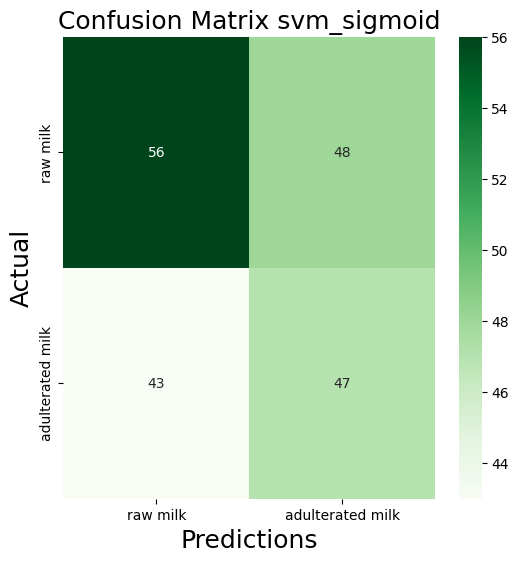

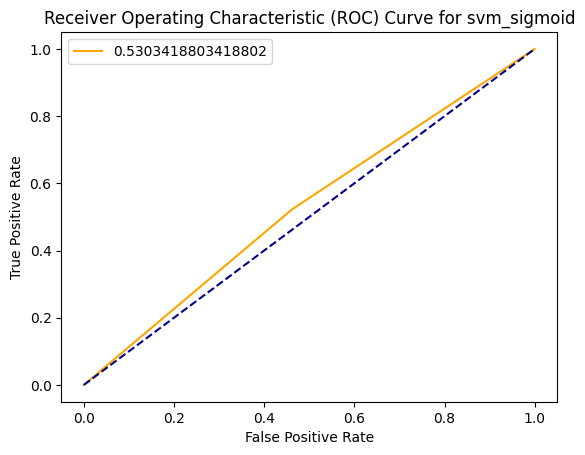

In [272]:
classification_models=[LogisticRegression(max_iter=500), GaussianNB(), KNeighborsClassifier(n_neighbors=3),
                        DecisionTreeClassifier(criterion='gini', random_state=32),
                        DecisionTreeClassifier(criterion='entropy', random_state=32),
                        svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),svm.SVC(kernel='sigmoid')]

model_name =['log_regg','naive_b','knn', 'DT_gini', 'DT_entropy', 'svm_linear', 'svm_rbf','svm_sigmoid']

all_accuracy_score1=[] # I have made this list to plot different ML models vs accuracy scores later on

#Creating for loop to train different models
for i in range(len(classification_models)): 
    model1=classification_models[i].fit(x1_train,y1_train)
    model_pred1= model1.predict(x1_test)

    accuracy1=accuracy_score(y1_test,model_pred1)
    all_accuracy_score1.append(accuracy1)
    class_report1= classification_report(y1_test,model_pred1)

    
    print(f'Accuracy score for {model_name[i]}: {round(accuracy1,3)}')
    print(f'classification report for {model_name[i]}:\n {class_report1}\n')

    #nb_pred=classification_models[1].predict(x_test)
    conf_mat1 = confusion_matrix(y1_test, model_pred1)
    labels = ['raw milk', 'adulterated milk']
    # Plot confusion matrix with custom labels
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(conf_mat1, 
                annot=True, 
                fmt='d', 
                cmap='Greens',
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actual', fontsize=18)
    plt.title(f'Confusion Matrix {model_name[i]}', fontsize=18)
    plt.show()

    
    
    auc = roc_auc_score(y1_test, model_pred1)
    fpr, tpr, thresholds = roc_curve(y1_test, model_pred1)
    plt.plot(fpr, tpr, color='orange', label=auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name[i]}')
    plt.legend()
    plt.show()


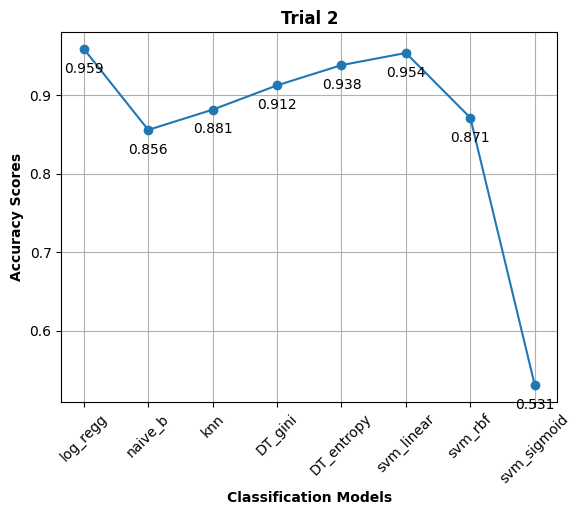

In [273]:
# I am plotting different  models vs accuracy score for TRAIL 2
x2=model_name
y2=all_accuracy_score1
plt.plot(x2,y2, marker='o')
for i in range(len(x2)):
    plt.text(x2[i], y2[i]-.03, str(round(y2[i],3)), ha='center')
plt.grid()
plt.xlabel('Classification Models', fontweight='bold')
plt.ylabel('Accuracy Scores', fontweight='bold')
plt.title('Trial 2',fontweight='bold')

plt.xticks(rotation=45);

After comapring trail 1 and trail 2 results, we can see that just only including spectroscopic results ,  not including other features related to milk, for model building is giving us almost equal accuracy. Not including other features for building model gives us more practical solution for automation as it requires less other time cosuming testing of milks. Thus for for my final model I will take only 518 spectroscopic features SPC2001- SPC2997 and I have chosen logistic regression model as my final model as it gives us the maximum accuracy.

Now for deplyment of this model on streamlit, I am saving the model, scaler and pca. My python file milk_adulteration.py contains the codes for streamlit Milk Adulteration Detection app.

In [274]:
with open('log_reg_m.pkl', 'wb') as f1:
    pickle.dump(log_reg, f1)

with open('scaler_m.pkl', 'wb') as f2:
    pickle.dump(scaler, f2)
with open('pca_m.pkl', 'wb') as f:
    pickle.dump(pca, f)